# ECE 685D, Fall 2020 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Guillem Amat Castello (ga98)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

<br>

### Problem 1 (Exponential Distribution)

Write a Python program for generating exponentially distributed random variable with parameter $λ$. Plot the histogram of $10^5$ random samples with bin width $.01$ for three different values of
$λ ∈ {.1, 1, 10}$.

In [2]:
#Creating a random variable with U ~ Unif(0,1)
x_values = np.random.uniform(0, 1, 10**5)

In [3]:
def exponential(lambda_parameter, x):
    return -np.log(1-x)/lambda_parameter

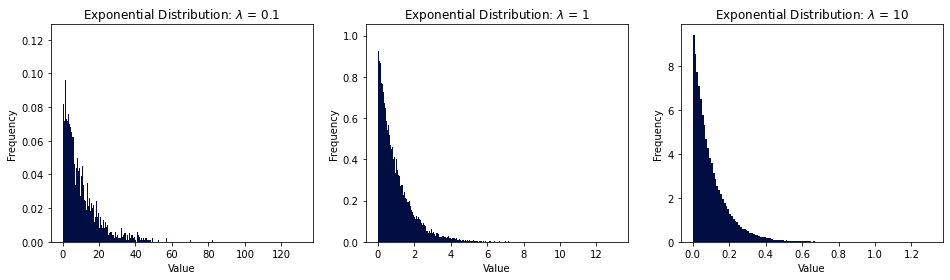

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, value in enumerate([0.1, 1, 10]):
    x = exponential(value, x_values)
    axes[i].hist(x, bins = np.arange(x.min(), x.max() + 0.01, 0.01), density=True, color='#000E43')
    axes[i].set_title(f'Exponential Distribution: $\\lambda$ = {value}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].plot()

<br>

### Problem 2 (Gamma Distribution)

Write a Python program for generating Gamma distributed random variable following $Gam(K, β)$. Plot the histogram of $10^{5}$ random samples with bin width $.01$ for $K = 5$ and $β ∈ {.1, 1, 10}$.

In [5]:
def gamma(K, Beta):
    gamma = 0
    for i in range(K):
        uniform = np.random.uniform(0, 1, 10**5)
        exp = exponential(1/Beta, uniform)
        gamma += exp
    return gamma

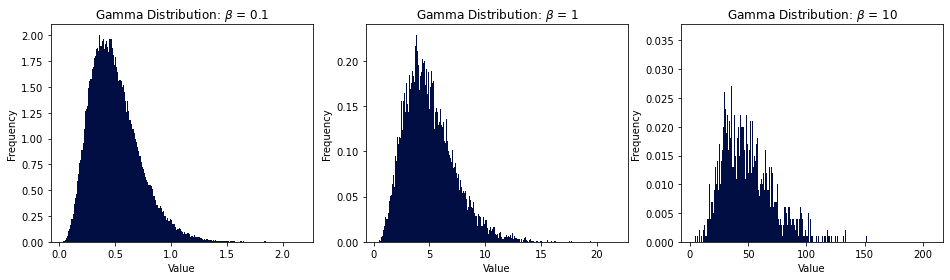

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, beta in enumerate([0.1, 1, 10]):
    x = gamma(5, beta)
    axes[i].hist(x, bins = np.arange(x.min(), x.max() + 0.01, 0.01), density=True, color='#000E43')
    axes[i].set_title(f'Gamma Distribution: $\\beta$ = {beta}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].plot()

<br>

### Problem 3 (Beta Distribution)

Write a Python program for generating Beta distributed random variable with positive integer parameters $α1$ and $α2$. Plot the histogram of $10^5$ random samples with bin width $.01$ for $(α1, α2) = (5, 16)$ and $(α1, α2) = (10, 11)$

In [7]:
def beta(alpha1, alpha2):
    k = alpha1
    n = alpha2 + k - 1
    x_values = np.zeros((10**5))
    for i in range(10**5):
        uniform = np.sort(np.random.uniform(0, 1, n))
        x_values[i] = uniform[k-1]
    return x_values

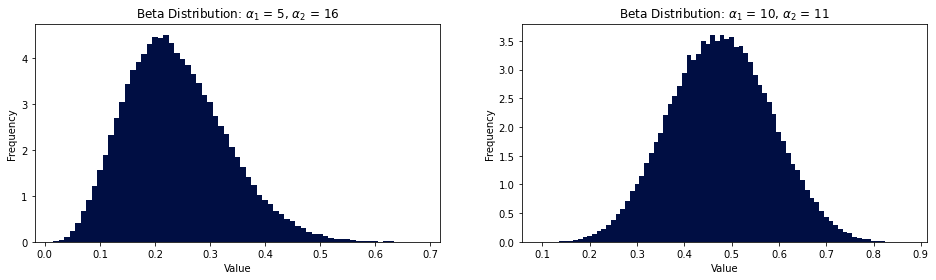

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

for i, alpha in enumerate([(5, 16), (10, 11)]):
    alpha1, alpha2 = alpha
    x = beta(alpha1, alpha2)
    axes[i].hist(x, bins = np.arange(x.min(), x.max() + 0.01, 0.01), density=True, color='#000E43')
    axes[i].set_title(f'Beta Distribution: $\\alpha_1$ = {alpha1}, $\\alpha_2$ = {alpha2}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].plot()

<br>

### Problem 4 (Dirichlet Distribution)

Write a Python program for generating Dirichlet distributed random vector with positive integer parameters $\alpha_i$ for $i$ = 1, . . . , N. Plot the 2-dimensional histogram of $10^{5}$ random samples with bin width $.01$ for N = 3 and ($\alpha_1$, $\alpha_2$, $\alpha_3$) = (10, 10, 10)

In [9]:
#Creating a dirichlet function from Gamma
def dirichlet_gamma(*alpha: int, beta:int = 1) -> np.array:
    '''Generating a dirichlet distribution by using gammas'''
    #pdb.set_trace()
    N = len([*alpha])
    D = np.zeros((10**5, N))
    for i, a_i in enumerate([*alpha]): 
        Y_i = gamma(a_i, beta)
        D[:, i] = Y_i
    return D/(np.sum(D, axis = 1).reshape(-1,1))

The Beta distribution is a special case of the Dirichlet distribution for N = 2. Write a Python program for generating Dirichlet distributed random vector using the stick method explained in the lecturenotes. Plot the 2-dimensional histogram of $10^{5}$ random samples with bin width $.01$ for N = 3 and ($\alpha_1$, $\alpha_2$, $\alpha_3$) = (10, 10, 10).

In [10]:
def multiple_beta(*alphas) -> np.array:
    '''Generating multiple beta distributions'''
    A = [*alphas]
    N = len(A)
    betas = np.zeros((10**5, N-1))
    #pdb.set_trace()
    for k, alpha in enumerate(A[:-1]):
        betas[:, k] = beta(alpha, sum(A[k+1:]))
    return betas

In [11]:
def dirichlet_beta(*alphas: int) -> np.array:
    '''Generating a dirichlet distribution through the stick method'''
    betas = multiple_beta(*alphas)
    V = 1
    D = np.zeros((betas.shape[0], betas.shape[1]))
    for row in range(betas.shape[0]):
        for column in range(betas.shape[1]):
            D[row, column] = betas[row, column] * V
            V *= (1 - betas[row, column])
        V = 1
    return D

We will proceed to plot the two generated Dirichlet distributions:

In [12]:
#Creating the distribution
dirichlets = [dirichlet_gamma(10,10,10), dirichlet_beta(10, 10, 10)]
names = ['$Dirichlet$ $Distribution$: $Gamma$ $Generated$', '$Dirichlet$ $Distribution$: $Beta$ $Generated$']

In [13]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['#000E43', '#002552', '#004261', '#00646F',
                           '#007D6F', '#22906F', '#44A373', '#66B57D',
                           '#88C68E', '#AAD7AA', '#D0E8CC'])

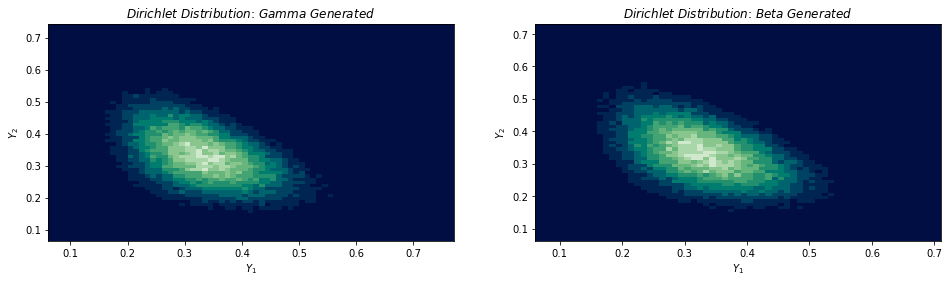

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

for i, d in enumerate(dirichlets): 
    x = np.arange(min(d[:,0]), max(d[:,0]) + .01, .01)
    y = np.arange(min(d[:,1]), max(d[:,1]) + .01, .01)
    axes[i].set_title(names[i])
    axes[i].set_xlabel('$Y_1$')
    axes[i].set_ylabel('$Y_2$')
    axes[i].hist2d(d[:,0],d[:,1], bins = [x, y], cmap = colormap)
    axes[i].plot()